In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import cv2
from sklearn.model_selection import train_test_split

# Features example

We hare going to use the hog features from skimage. </br>
We take a sample image to illustrate it.

In [2]:
test_file = '/kaggle/input/neural-networks-homer-and-bart-classification/homer_bart_1/bart110.bmp'

test_image = cv2.imread(test_file) #We load the image

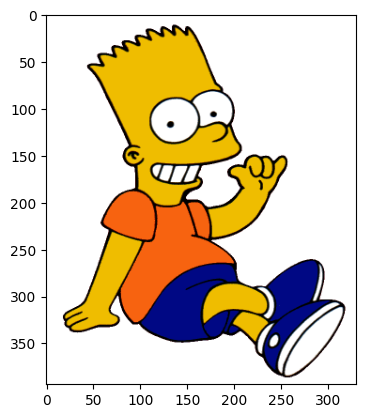

In [3]:
plt.imshow(test_image[...,::-1]) #OpenCV use the BGR format and matplotlib use RGB so we convert BGR to RGB

In [4]:
test_image = cv2.resize(test_image, (128, 128)) #we resize the image
test_image = cv2.cvtColor(test_image, cv2.COLOR_BGR2GRAY) #we convert it to 1 channel 

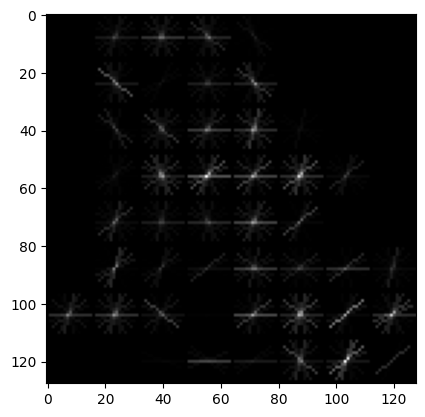

In [5]:
from skimage.feature import hog

test_image_features, test_hog_image = hog(test_image,
                              visualize=True,
                              block_norm='L2-Hys',
                              pixels_per_cell=(16, 16))

## This is what the hog feature looks like
plt.imshow(test_hog_image, cmap=plt.cm.gray)

# Dataset

In [6]:
import os

image_folder = '/kaggle/input/neural-networks-homer-and-bart-classification/homer_bart_1'
filenames = os.listdir(image_folder) #list of all the bmp images without folder
filenames.sort()
filenames[:10]

['bart1.bmp',
 'bart10.bmp',
 'bart100.bmp',
 'bart101.bmp',
 'bart102.bmp',
 'bart103.bmp',
 'bart104.bmp',
 'bart105.bmp',
 'bart106.bmp',
 'bart108.bmp']

In [7]:
labels = np.array([int('bart' in filename) for filename in filenames]) #the labels, 1 for bart and 0 for homer
labels.reshape((len(labels),1))
labels[:10]

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [8]:
labels_dic = {'Homer': 0, 'Bart': 1}
labels_dic

{'Homer': 0, 'Bart': 1}

In [9]:
#this will load the images into a list.
def load_data(list_images):
    df_images = []
    for image in list_images:
        image = os.path.join(image_folder, image) #we join the folder and image name to obtain the image path
        image = cv2.imread(image) #we read the image
        image = cv2.resize(image, (128, 128)) #we resize it
        image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) #we convert it to 1 channel (Gray scale)
        
        df_images.append(image) #we append the image to the list
    return df_images

In [10]:
df_images = load_data(filenames)
df_images[0]

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)

In [11]:
#This will compute the hog feature and append it to a list
def hog_feature(df_images):
    df_hogs = []
    for image in df_images:
        hog_features, hog_image = hog(image,
                              visualize=True,
                              block_norm='L2-Hys',
                              pixels_per_cell=(16, 16))
        df_hogs.append(hog_features)
    return df_hogs

In [12]:
df_hogs = hog_feature(df_images)
df_hogs[0]

array([0.        , 0.        , 0.        , ..., 0.20052635, 0.03925758,
       0.03720221])

In [13]:
df_hogs = np.array(df_hogs).astype(np.float32)

We split the datasets into train and test sets.

In [14]:
X_train, X_test, y_train, y_test = train_test_split(df_hogs, labels, test_size = 0.2, random_state = 4)

# Model

We create the SVM model.

In [15]:
svm = cv2.ml.SVM_create()
svm.setType(cv2.ml.SVM_C_SVC)
svm.setKernel(cv2.ml.SVM_LINEAR)
svm.setTermCriteria((cv2.TERM_CRITERIA_MAX_ITER, 100, 1e-6))

In [16]:
svm.train(X_train, cv2.ml.ROW_SAMPLE, y_train)

True

# Accuracy

In [17]:
y_pred = svm.predict(X_test)

In [18]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred[1])

0.7777777777777778

# Confusion Matrix

In [19]:
from sklearn.metrics import confusion_matrix
cmx = confusion_matrix(y_test, y_pred[1], labels=list(labels_dic.values()))

<Axes: >

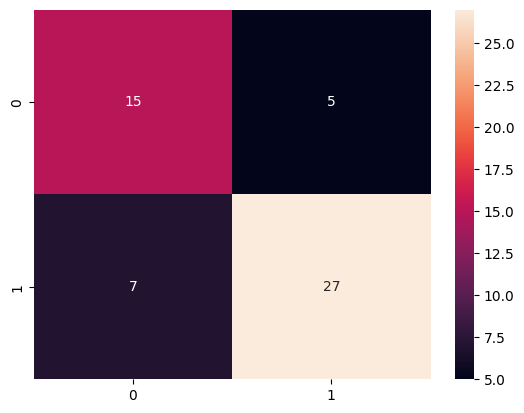

In [20]:
import seaborn as sns
cmx_df = pd.DataFrame(cmx)
sns.heatmap(cmx_df, annot=True)

# F1 score

In [21]:
from sklearn.metrics import f1_score
f1_score = f1_score(y_test, y_pred[1])
f1_score

0.8181818181818182